In [1]:
from bisect import bisect_left
import matplotlib.pyplot as plt
import matplotlib as mpl
from collections import Counter
from tf_agents.trajectories import TimeStep
import seaborn as sns
import tensorflow as tf
import itertools
import numpy as np
mpl.rcParams.update(mpl.rcParamsDefault)

def find_closest(values, n):
    # Find the position where n would be inserted to keep the list ordered
    pos = bisect_left(values, n)
    
    # Check if the position is at the extremes of the list
    if pos == 0:
        return pos
    if pos == len(values):
        return pos - 1
    
    # Get the closest values on either side of the insertion point
    before = values[pos - 1]
    after = values[pos]
    
    # Return the value which is closer to n
    if abs(before - n) <= abs(after - n):
        return pos - 1
    else:
        return pos

2024-06-25 11:43:12.907842: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-25 11:43:12.907875: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-25 11:43:12.908918: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-25 11:43:12.914499: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-25 11:43:13.624735: W tensorflow/compiler/tf2

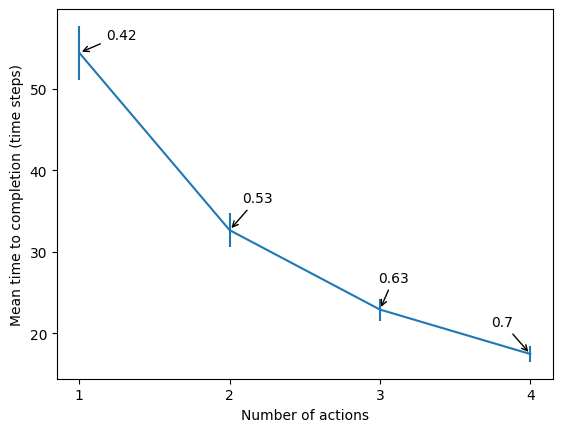

In [3]:
# Expected time vs num actions
ts = [54.433, 32.67300033569336, 22.927, 17.4725]
terrs = [3.305238690246137, 2.068599499234668, 1.3499744780345928, 0.9716208775597786]
actions = [1,2,3,4]



plt.errorbar(actions, ts, yerr=terrs)
plt.annotate('0.42', (actions[0], ts[0]), textcoords="offset points", xytext=(30,10), ha='center',
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('0.53', (actions[1], ts[1]), textcoords="offset points", xytext=(20,20), ha='center',
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('0.63', (actions[2], ts[2]), textcoords="offset points", xytext=(10,20), ha='center',
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate('0.7', (actions[3], ts[3]), textcoords="offset points", xytext=(-20,20), ha='center',
             arrowprops=dict(facecolor='black', arrowstyle='->'))
    
# plt.ylim(0, 70)
# plt.xlim(0.65,4.35)
plt.ylabel("Mean time to completion (time steps)")
plt.xlabel("Number of actions")
plt.xticks(actions)
plt.savefig("../figures/4bins/n_actions_vs_time.png")
plt.show()

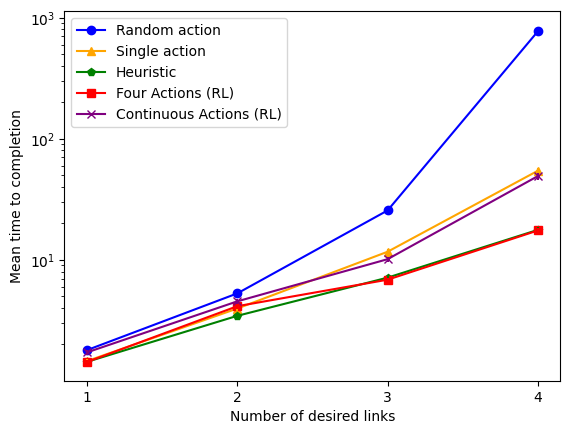

In [4]:
links = [1,2,3,4]
single_action, single_action_err = [1.458, 3.959,11.6605, 54.433], [0.056772017755228665, 0.17586908625452058, 0.6414363404695747, 3.305238690246137]
heuristic, heuristic_err = [1.4365, 3.447, 7.1265, 17.674], [0.05474353728980253, 0.12627097647519797, 0.3098180754491255, 0.9693963369025075]
four_actions, four_actions_err = [1.4335, 4.139500141143799, 6.851500034332275, 17.4725], [0.05267446860485469, 0.18473814316158538, 0.28483768349300687, 0.9716208775597786]
random_action, random_action_err = [1.796, 5.28, 25.5745, 771.7695],[0.08098288708116054, 0.25637804118137725, 1.5826748004170028, 50.9267341547038]
cont_actions, cont_actions_err = [1.7200000286102295, 4.53849983215332, 10.1225004196167, 49.16299819946289], [0.07371702613545662,  0.1819954159196392, 0.5023073939997851, 3.1702538191976606]

plt.plot(links, random_action, label="Random action", marker='o', color='blue')
plt.plot(links, single_action, label="Single action", marker='^', color='orange')
plt.plot(links, heuristic, label="Heuristic", marker='p', color='green')
plt.plot(links, four_actions, label="Four Actions (RL)", marker='s', color='red')
plt.plot(links, cont_actions, label="Continuous Actions (RL)", marker='x', color='purple')
plt.errorbar(links, random_action, yerr=random_action_err, fmt='none', ecolor='blue')
plt.errorbar(links, single_action, yerr=single_action_err, fmt='none', ecolor='orange')
plt.errorbar(links, heuristic, yerr=heuristic_err, fmt='none', ecolor='green')
plt.errorbar(links, four_actions, yerr=four_actions_err, fmt='none', ecolor='red')
plt.errorbar(links, cont_actions, yerr=cont_actions_err, fmt='none', ecolor='purple')



plt.xlabel("Number of desired links")
plt.ylabel("Mean time to completion")
plt.yscale('log')
plt.xticks(links)
plt.legend()
plt.savefig("../figures/4bins/n_links_diff_policies.png")


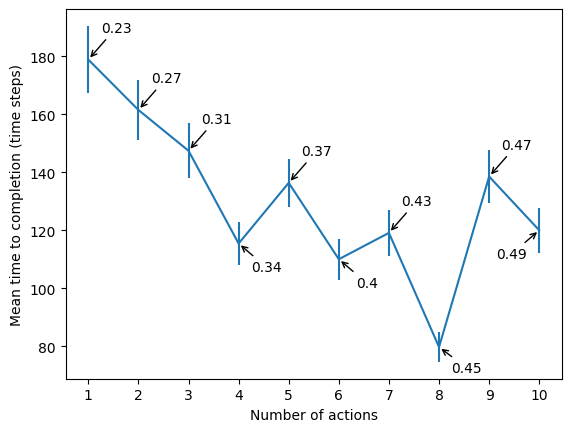

In [3]:
rl_policy, rl_policy_errs = [178.8095, 161.447, 147.4005, 115.431, 136.3405, 110.0195, 119.0945, 79.758, 138.51, 119.994], [11.608894174032038, 10.376454069604081, 9.425292658740478, 7.4027946605000485, 8.327873957044192, 7.008025928085956, 7.812753478723207, 5.131950530574311, 9.169274203053698, 7.697456735428717]
actions = [1, 2,3,4,5,6,7,8,9,10]
plt.errorbar(actions, rl_policy, yerr=rl_policy_errs)
ps = [0.49, 0.47, 0.45, 0.43, 0.40, 0.37, 0.34, 0.31, 0.27, 0.23]
offsets = [(20,20), (20,20), (20,20), (20,-20), (20,20), (20,-20), (20,20), (20,-18), (20,20), (-20,-20)]
ps.reverse()
for i in range(len(ps)):
    plt.annotate(f'{ps[i]}', (actions[i], rl_policy[i]), textcoords="offset points", xytext=offsets[i], ha='center',
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.ylabel("Mean time to completion (time steps)")
plt.xlabel("Number of actions")
plt.xticks(actions)
plt.savefig("./figures/10bins/n_actions_vs_time.png")

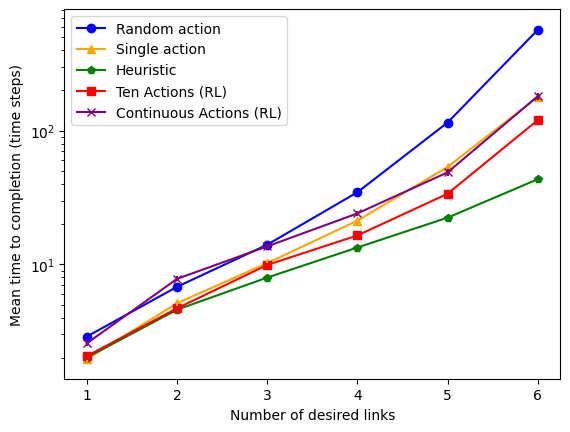

In [7]:
links = [1,2,3,4,5,6]
single_action, single_action_err = [1.963, 5.133, 10.232, 21.2465, 53.609, 178.8095], [0.09445548951755002, 0.22162784008332523, 0.4855886036553988, 1.155663584212551, 3.2032226016154413, 11.608894174032038]
random_action, random_action_err = [2.8915, 6.8085, 14.0545, 34.661, 115.106, 567.779], [0.15348053581806392,0.31741097157313264,0.6748684196752727,1.9235663116981434,7.272190518543914,39.14307819034547]
heuristic, heuristic_err = [2.0145, 4.5925, 7.983, 13.389, 22.3885, 43.3755], [0.09556047234604902, 0.18627129911771165, 0.30814477035964766, 0.5811089015838597, 1.1103558235426156, 2.4581641012908397]
ten_actions, ten_actions_err = [2.067, 4.7025, 9.916, 16.477, 33.779, 119.994], [0.0976386124039472, 0.20495725796934777, 0.42002113051934886, 0.8088171153076706, 1.8850950227561207, 7.697456735428717]
cont_actions, cont_actions_err = [2.57450008392334, 7.808499813079834, 13.654500007629395, 24.081499099731445, 48.80099868774414, 181.02650451660156], [0.13494080805248618, 0.348535124246692, 0.6454259399495197, 1.2239096886517857, 2.942067562009051, 11.665851810982064]

plt.plot(links, random_action, label="Random action", marker='o', color='blue')
plt.plot(links, single_action, label="Single action", marker='^', color='orange')
plt.plot(links, heuristic, label="Heuristic", marker='p', color='green')
plt.plot(links, ten_actions, label="Ten Actions (RL)", marker='s', color='red')
plt.plot(links, cont_actions, label="Continuous Actions (RL)", marker='x', color='purple')
plt.errorbar(links, random_action, yerr=random_action_err, fmt='none', ecolor='blue')
plt.errorbar(links, single_action, yerr=single_action_err, fmt='none', ecolor='orange')
plt.errorbar(links, heuristic, yerr=heuristic_err, fmt='none', ecolor='green')
plt.errorbar(links, ten_actions, yerr=ten_actions_err, fmt='none', ecolor='red')
plt.errorbar(links, cont_actions, yerr=cont_actions_err, fmt='none', ecolor='purple')


plt.xlabel("Number of desired links")
plt.ylabel("Mean time to completion (time steps)")
plt.yscale('log')
plt.xticks(links)
plt.legend()
plt.savefig("./figures/10bins/n_links_diff_policies.png")

In [24]:

policy = tf.saved_model.load("./saved_models/10bins/discrete/6links_10actions/policy")

fidelities = [0.5000009999999999, 0.5208227669187396, 0.5433787177479525, 0.5678132875803512, 0.5942829410839893, 0.6229571744103175, 0.6540196005482233, 0.6876691250740252, 0.7241212198262379, 0.7636093026609719]
fidelities.reverse()

fidelity_ranges = np.linspace(0.5, 0.76,20).tolist()
for i in range(len(fidelity_ranges)):
    fidelity_ranges[i] = round(fidelity_ranges[i],2)
action_to_prob = {0:0.49, 1:0.47, 2:0.45, 3:0.43, 4:0.40, 5:0.37, 6:0.34, 7:0.31, 8:0.27, 9:0.23}

policy_counts = {(n_links, fidelity_range): [] for n_links in range(6) for fidelity_range in range(len(fidelity_ranges))}

for state in itertools.product(range(6), range(6), range(6), range(6), range(6),range(6),range(6),range(6),range(6),range(6)):
    num_links = sum(state)
    
    # Ignore any state with more than 6 links
    if num_links > 5: 
        continue
    state = list(state)
    
    # Ignore starting state
    if state == [0,0,0,0,0,0,0,0,0,0]:
        continue

    observation = tf.constant([state], dtype=tf.int32)
    reward = tf.constant([-1], dtype=tf.float32)
    discount = tf.constant([1], dtype=tf.float32)
    step_type = tf.constant([1], dtype=tf.int32)
    time_step = TimeStep(step_type=step_type,reward=reward,discount=discount,observation=observation)
    
    avg_fidelity = sum(state[i]*fidelities[i] for i in range(len(state))) / num_links if num_links > 0 else 0
    fidelity_range = find_closest(fidelity_ranges,avg_fidelity)
    action = policy.action(time_step).action.numpy()[0]
    if fidelity_range != -1:
        action = action_to_prob[action]
        policy_counts[(num_links, fidelity_range)].append(action)
        
most_common_policy = {}
for key,values in policy_counts.items():
    if values:
        most_common_policy[key] = Counter(values).most_common(1)[0][0]
    else:
        most_common_policy[key] = None
        
heatmap_matrix = np.full((5, len(fidelity_ranges)), np.nan)
    

for (n_links, fidelity_range), policy_value in most_common_policy.items():
    if policy_value is not None:
        heatmap_matrix[(n_links-1, fidelity_range)] = policy_value


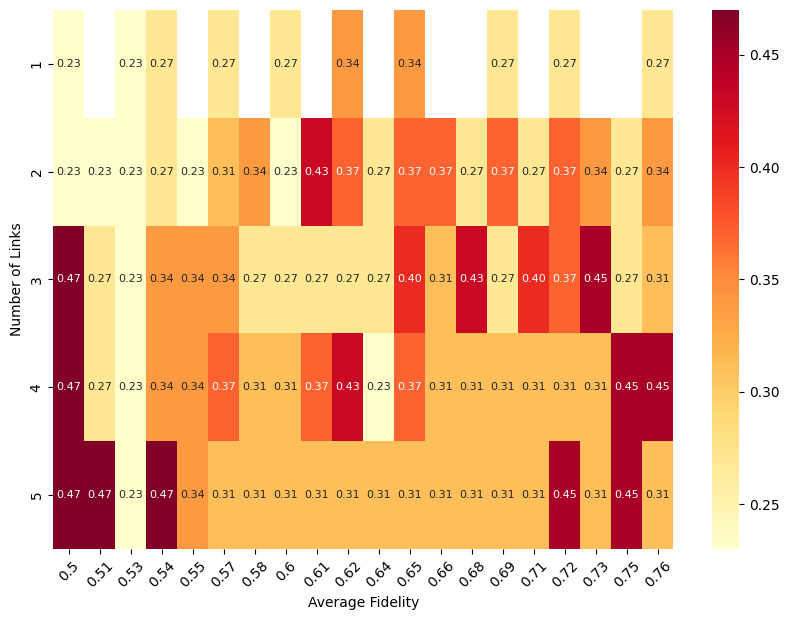

In [25]:
plt.figure(figsize=(10, 7))
sns.heatmap(heatmap_matrix, annot=True, fmt='.2f', xticklabels=fidelity_ranges, yticklabels=[1,2,3,4,5], cmap="YlOrRd", annot_kws={"fontsize": 8})
plt.xlabel('Average Fidelity')
plt.ylabel('Number of Links')
plt.xticks(rotation=45)

# plt.savefig('./figures/10bins/8actions_heatmap.png')
plt.show()


In [22]:
from Heuristics import MatchingHeuristic

fidelities = [0.5000009999999999, 0.5208227669187396, 0.5433787177479525, 0.5678132875803512, 0.5942829410839893, 0.6229571744103175, 0.6540196005482233, 0.6876691250740252, 0.7241212198262379, 0.7636093026609719]
fidelities.reverse()
mh = MatchingHeuristic(0.23, 6, 0.5, 0.08, 1, [0.2, 0.5])

fidelity_ranges = np.linspace(0.5, 0.76,20).tolist()
for i in range(len(fidelity_ranges)):
    fidelity_ranges[i] = round(fidelity_ranges[i],2)
action_to_prob = {0:0.49, 1:0.47, 2:0.45, 3:0.43, 4:0.40, 5:0.37, 6:0.34, 7:0.31, 8:0.27, 9:0.23}


policy_counts = {(n_links, fidelity_range): [] for n_links in range(6) for fidelity_range in range(len(fidelity_ranges))}

for state in itertools.product(range(6), range(6), range(6), range(6), range(6),range(6),range(6),range(6),range(6),range(6)):
    num_links = sum(state)
    if num_links > 5:
        continue
    state = list(state)
    
    if state == [0,0,0,0,0,0,0,0,0,0]:
        continue

    
    avg_fidelity = sum(state[i]*fidelities[i] for i in range(len(state))) / num_links if num_links > 0 else 0
    fidelity_range = find_closest(fidelity_ranges,avg_fidelity)
    action = mh.action(state)
    action = np.floor(100*action)/100
    if fidelity_range != -1:
        policy_counts[(num_links, fidelity_range)].append(action)
        
most_common_policy = {}
for key,values in policy_counts.items():
    if values:
        most_common_policy[key] = Counter(values).most_common(1)[0][0]
    else:
        most_common_policy[key] = None
        
heatmap_matrix = np.full((5, len(fidelity_ranges)), np.nan)
    

for (n_links, fidelity_range), policy_value in most_common_policy.items():
    if policy_value is not None:
        heatmap_matrix[(n_links-1, fidelity_range)] = policy_value

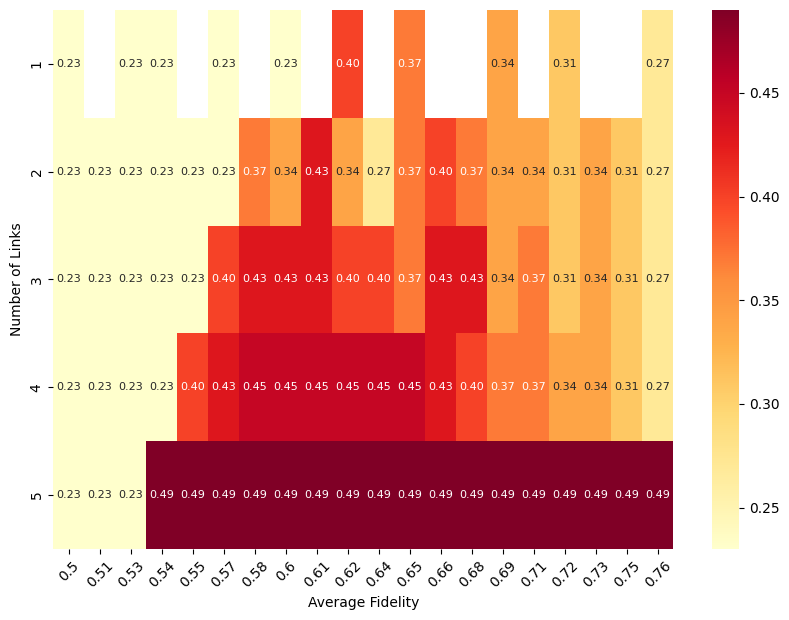

[0.23, 0.28, 0.31, 0.35, 0.38, 0.41, 0.43, 0.46, 0.5]

In [23]:
plt.figure(figsize=(10, 7))
sns.heatmap(heatmap_matrix, annot=True, fmt='.2f', xticklabels=fidelity_ranges, yticklabels=[1,2,3,4,5], cmap="YlOrRd", annot_kws={"fontsize": 8})
plt.xlabel('Average Fidelity')
plt.ylabel('Number of Links')
plt.xticks(rotation=45)

plt.savefig('./figures/10bins/heuristic_heatmap.png')
plt.show()
[0.23, 0.28, 0.31, 0.35, 0.38, 0.41, 0.43, 0.46, 0.50]

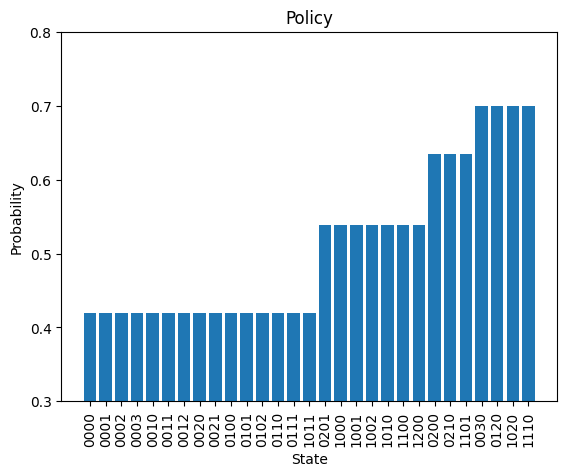

In [15]:
from tf_agents.trajectories import TimeStep

policy = tf.saved_model.load('../saved_models/4bins/discrete/4links_4actions/policy')


# fake timestep composition
states = []
state_to_action = {}
action_to_prob = {3:0.42, 2:0.538, 1:0.635, 0:0.7}
for state in itertools.product(range(2), range(3), range(4), range(4)):
    if sum(state) > 3:
        continue
    state = list(state)
    observation = tf.constant([state], dtype=tf.int32)[0], 
    reward = tf.constant([-1], dtype=tf.float32)
    discount = tf.constant([1], dtype=tf.float32)
    step_type = tf.constant([1], dtype=tf.int32)
    
    # Create a TimeStep object
    time_step = TimeStep(step_type=step_type, reward=reward, discount=discount, observation=observation)
    state_to_action[''.join(map(str, state))] = action_to_prob[policy.action(time_step).action.numpy()[0]]

state_to_action = dict(sorted(state_to_action.items(), key=lambda item: item[1]))
labels = list(state_to_action.keys())
values = list(state_to_action.values())

plt.bar(labels,values)
plt.title("Policy")
plt.xlabel("State")
plt.ylabel("Probability")
plt.xticks(rotation=90)
plt.ylim([0.3,0.8]) 
plt.show()